In [1]:
import pandas as pd
import numpy as np

In [2]:

# Read the excel file to dataframe

df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df.head(3)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [3]:

# Standardize header names

def standardize_header_names(df):
    '''
        Standardize header names.
        This will convert all column headers to lower letters and swap
        whitespaces against underscores.
        
        Inputs:
            df -> Dataframe
        Outputs:
            Dataframe with standardizes column headers  
    '''
    data = df.copy()
    cols = []
    for col in data.columns:
        cols.append(col.lower().replace(' ', '_'))
    data.columns = cols
    return data

df = standardize_header_names(df)


In [4]:

# Extract numerical column from dataframe

X_num = df.select_dtypes(np.number)


<AxesSubplot:>

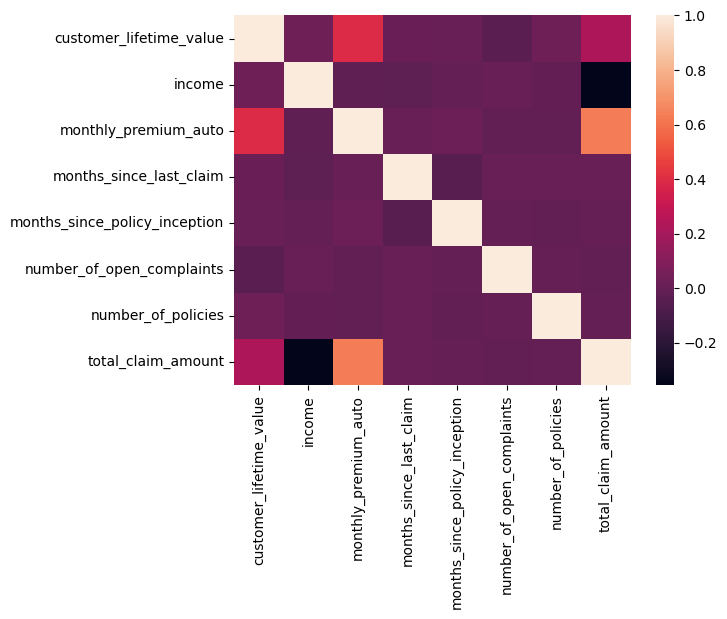

In [5]:

# Plot correlation matrix as heatmap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(X_num.corr())


In [6]:

# Do the X-y split
data = df.copy()

y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)

print(X.shape)
print(y.shape)


(9134, 23)
(9134,)


In [7]:

# Split X into numerical and categorial columns
X_num = X.select_dtypes(np.number)
X_cat = X.select_dtypes(object)


In [8]:

# Normalize all numerical columns of X using the MinMaxScaler
# This will scale all within a range from 0.0 to 1.0.

from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X_num)

X_normalized = minMaxScaler.transform(X_num)
X_normalized_df = pd.DataFrame(X_normalized, columns=X_num.columns)

display(X_normalized)
print(X_normalized.shape)
display(X_normalized_df)


array([[0.01062925, 0.56284694, 0.03375527, ..., 0.05050505, 0.        ,
        0.        ],
       [0.06240565, 0.        , 0.13924051, ..., 0.42424242, 0.        ,
        0.875     ],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.38383838, 0.        ,
        0.125     ],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.37373737, 0.6       ,
        0.125     ],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.03030303, 0.        ,
        0.25      ],
       [0.00876645, 0.        , 0.06751055, ..., 0.90909091, 0.        ,
        0.        ]])

(9134, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250


In [9]:

# Normalize X using the StandardScaler
#
# Info: The StandardScaler is a method of standardizing data such the the transformed
# feature has 0 mean and and a standard deviation of 1.
# The transformed features tells us how many standard deviation the original feature
# is away from the feature’s mean value also called a z-score in statistics.

from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
stdScaler.fit(X_num)
X_standardized = stdScaler.transform(X_num)

print(X_standardized.shape)
pd.DataFrame(X_standardized, columns=X_num.columns)


(9134, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


In [10]:

# So we see that the mean is 0 and the standard deviation is 1 now.
print(f"Mean: {round(X_standardized.mean())}")
print(f"Standard Deviation: {round(X_standardized.std())}")


Mean: 0
Standard Deviation: 1


In [11]:

# We delete column 'customer' and 'effective_to_date' since it doesn't make sense to
# convert them to numerical.
X_cat_to_encode = X_cat.drop(['customer','effective_to_date'], axis=1)
X_cat_to_encode.columns.tolist()


['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [12]:

# OneHot Encoding
# Convert categorial columns into multiple numerical columns.

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(X_cat_to_encode) # This determines how many unique values has each categorical column

print(encoder.categories_)
encoded = encoder.transform(X_cat_to_encode).toarray()
#print(encoded)

#onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
onehot_encoded_df.head()


[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:

# Concatenate normalized numerical columns with one-hot-encoded columns


X = pd.concat([X_normalized_df, onehot_encoded_df], axis=1)

print(f'Old number of columns = {len(df.columns.tolist())}')
print(f'New number of columns = {len(X.columns.tolist())}')


Old number of columns = 24
New number of columns = 64


In [14]:

# Apply train/test split
# Here we use 20% of the data for testing and RNG-seed=42

from sklearn.model_selection import train_test_split

# Split X,y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train: {X_train.shape}')
print(f'X_test:  {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test:  {y_test.shape}')


X_train: (7307, 64)
X_test:  (1827, 64)
y_train: (7307,)
y_test:  (1827,)


In [15]:
# Apply linear regression, train/fit the model

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [16]:

# Model Validation

from sklearn.metrics import r2_score

# Predict training set
y_pred_train = lm.predict(X_train)
print(f"y_pred_train = {y_pred_train}")

# R2 score for training set
r2_train = r2_score(y_train, y_pred_train)
print(f"r2_train     = {r2_train}")


y_pred_train = [192. 560. 404. ... 820. 772. 268.]
r2_train     = 0.7722468160609507


In [17]:

# Predict test set
y_pred_test  = lm.predict(X_test)
print(f"y_pred_test = {y_pred_test}")

# R2 score for test set
r2_test = r2_score(y_test, y_pred_test)
print(f"r2_test     = {r2_test}")


y_pred_test = [200. 456. 464. ... 172. 512. 646.]
r2_test     = 0.7615215947828678


In [18]:

from sklearn.metrics import mean_squared_error

# MSE - Mean Squared Error
mse = mean_squared_error(y_test,y_pred_test)
mse


18961.66619963692

In [19]:

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
rmse


137.70136600497804

In [20]:

from sklearn.metrics import mean_absolute_error

# MAE - Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)
mae


93.9824772014231